In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-deep')
print("Libraries imported successfully.")

Libraries imported successfully.


In [4]:
# Load the dataset from the data folder
df = pd.read_csv('SuperMarket Analysis.csv')

print("Dataset loaded successfully.")

Dataset loaded successfully.


In [5]:
# Display the first 5 rows to understand the structure
print("First 5 rows of the dataset:")
display(df.head())

# Get a concise summary of the dataframe
print("\nDataset Information:")
df.info()

# Get descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the dataset:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gro

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
# Check for the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"There are {duplicate_rows} duplicate rows in the dataset.")

# Remove duplicate rows
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

There are 0 duplicate rows in the dataset.


In [7]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())
# This dataset is quite clean, but this is a crucial step in any real-world project.

Missing values per column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [8]:
# Convert 'Date' and 'Time' columns to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time # Keep only the time part

# Extract 'Month', 'Day of Week', and 'Hour'
df['Month'] = df['Date'].dt.month_name()
df['Day of week'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

print("New features created: 'Month', 'Day of week', 'Hour'")
display(df[['Date', 'Time', 'Month', 'Day of week', 'Hour']].head())

New features created: 'Month', 'Day of week', 'Hour'


C:\Users\raute\AppData\Local\Temp\ipykernel_20508\366691211.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time # Keep only the time part


,Date,Time,Month,Day of week,Hour
0,2019-01-05,13:08:00,January,Saturday,13
1,2019-03-08,10:29:00,March,Friday,10
2,2019-03-03,13:23:00,March,Sunday,13
3,2019-01-27,20:33:00,January,Sunday,20
4,2019-02-08,10:37:00,February,Friday,10


C:\Users\raute\AppData\Local\Temp\ipykernel_20508\844311328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Branch', data=df, order=df['Branch'].value_counts().index, palette='viridis')


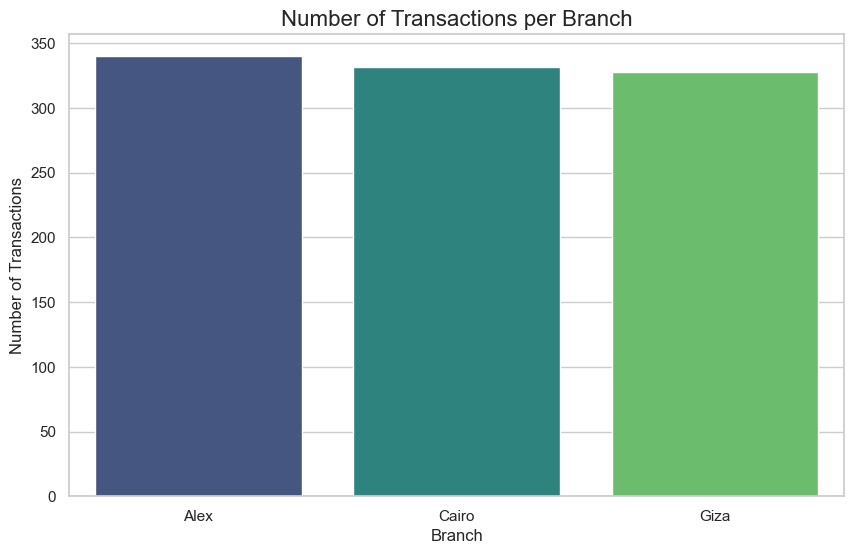

Total Gross Income by Branch:
 Branch
Giza     5265.1765
Alex     5057.1605
Cairo    5057.0320
Name: gross income, dtype: float64


In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', data=df, order=df['Branch'].value_counts().index, palette='viridis')
plt.title('Number of Transactions per Branch', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

# Analyze total gross income per branch
branch_income = df.groupby('Branch')['gross income'].sum().sort_values(ascending=False)
print("Total Gross Income by Branch:\n", branch_income)

**Insight:** Branch Alex has the most transactions,it also generates the highest gross income, indicating higher-value purchases or better margins at that location.

C:\Users\raute\AppData\Local\Temp\ipykernel_20508\2551573421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product line', data=df, order=df['Product line'].value_counts().index, palette='plasma')


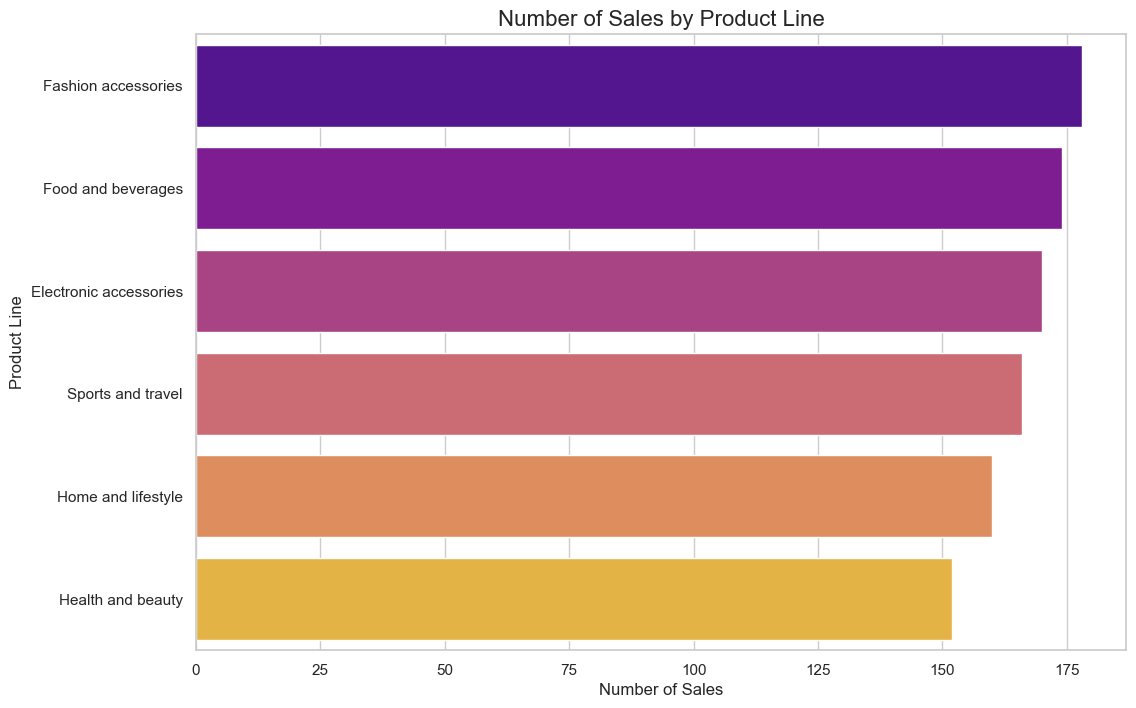

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Product line', data=df, order=df['Product line'].value_counts().index, palette='plasma')
plt.title('Number of Sales by Product Line', fontsize=16)
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Product Line', fontsize=12)
plt.show()

**Insight:** "Fashion accessories" and "Food and beverages" are the most frequently sold product lines, suggesting they are key drivers of foot traffic.

C:\Users\raute\AppData\Local\Temp\ipykernel_20508\3300262139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='magma')


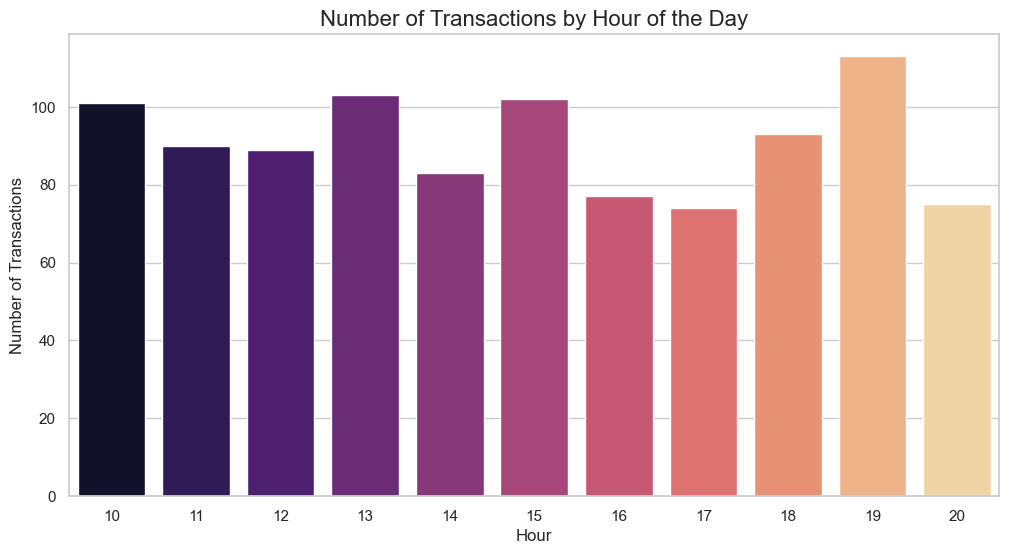

C:\Users\raute\AppData\Local\Temp\ipykernel_20508\3300262139.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day of week', data=df, order=day_order, palette='cividis')


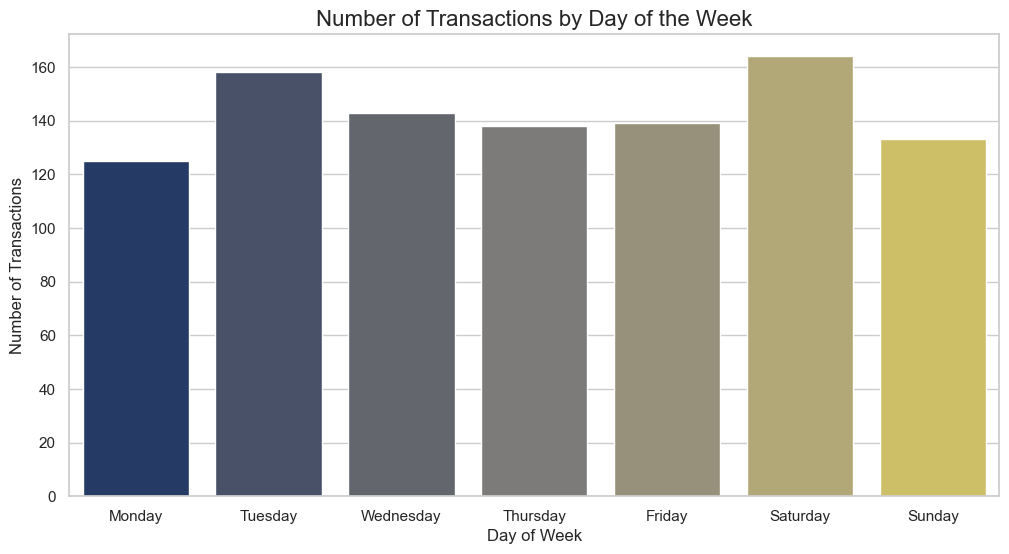

In [11]:
# Define the correct order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot transactions by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='magma')
plt.title('Number of Transactions by Hour of the Day', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()


# Plot transactions by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='Day of week', data=df, order=day_order, palette='cividis')
plt.title('Number of Transactions by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

**Insight:** The busiest time is in the early afternoon, between 12 PM and 3 PM. Saturday is the busiest day, indicating a strong weekend shopping trend. It is also observed that 7 PM is the busiest hour Indicating Higher footfall due to post work rush

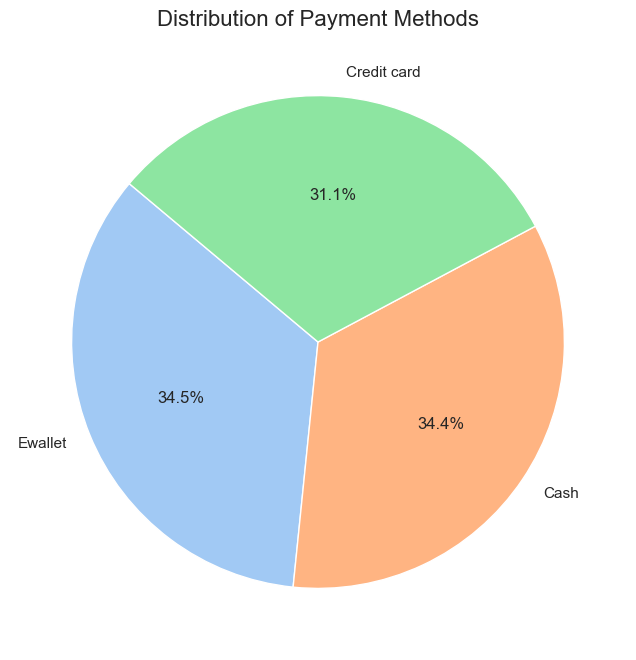

In [17]:
payment_counts = df['Payment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Payment Methods', fontsize=16)
plt.ylabel('') # Hide the y-label
plt.show()

## 4. Exporting Cleaned Data

The dataframe now includes our new features. We will save it to a new CSV file to use as the data source for our Tableau dashboard.

In [18]:
# The df dataframe now contains all our new features
output_path = 'cleaned_supermarket_data.csv'
df.to_csv(output_path, index=False)

print(f"Cleaned and enhanced data successfully exported to: {output_path}")

Cleaned and enhanced data successfully exported to: cleaned_supermarket_data.csv
